In [19]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

Statistical Section 

In [81]:
#load data
df_mat=pd.read_csv("student-mat.csv", sep=';')
df_por=pd.read_csv("student-por.csv", sep=';')
df_mat.head()
df_por.head()

#Row/column count 
len(df_mat)         
len(df_mat.columns)
len(df_por)
len(df_por.columns)

33

In [83]:
df_mat.head()
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Based on the correlation heatmap, the top 3 features most strongly correlated with student grades are G1, G2, and G3, which makes sense given that students with good grades previously are liekly to have good grades again.  BEsdies these obvious 3 there is 'Failures' whuch is negatively correlated with all grades; up to -0.36, studytime which is positively correlated with G3 at 0.25, and motehrs education which is positively correlated with G3 at 0.22.  

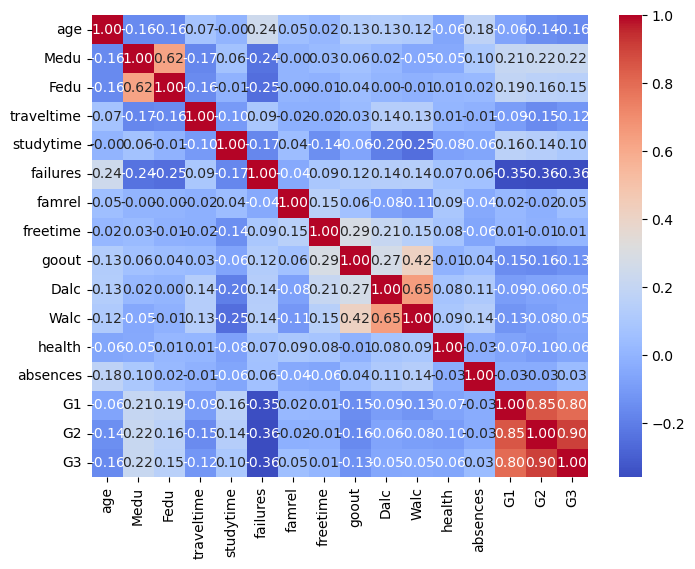

In [88]:
#Select columns for correlation matrix
correlation_matrix = df_mat[['age', 'Medu', 'Fedu', 'traveltime', 'studytime','failures', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'G1', 'G2', 'G3']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


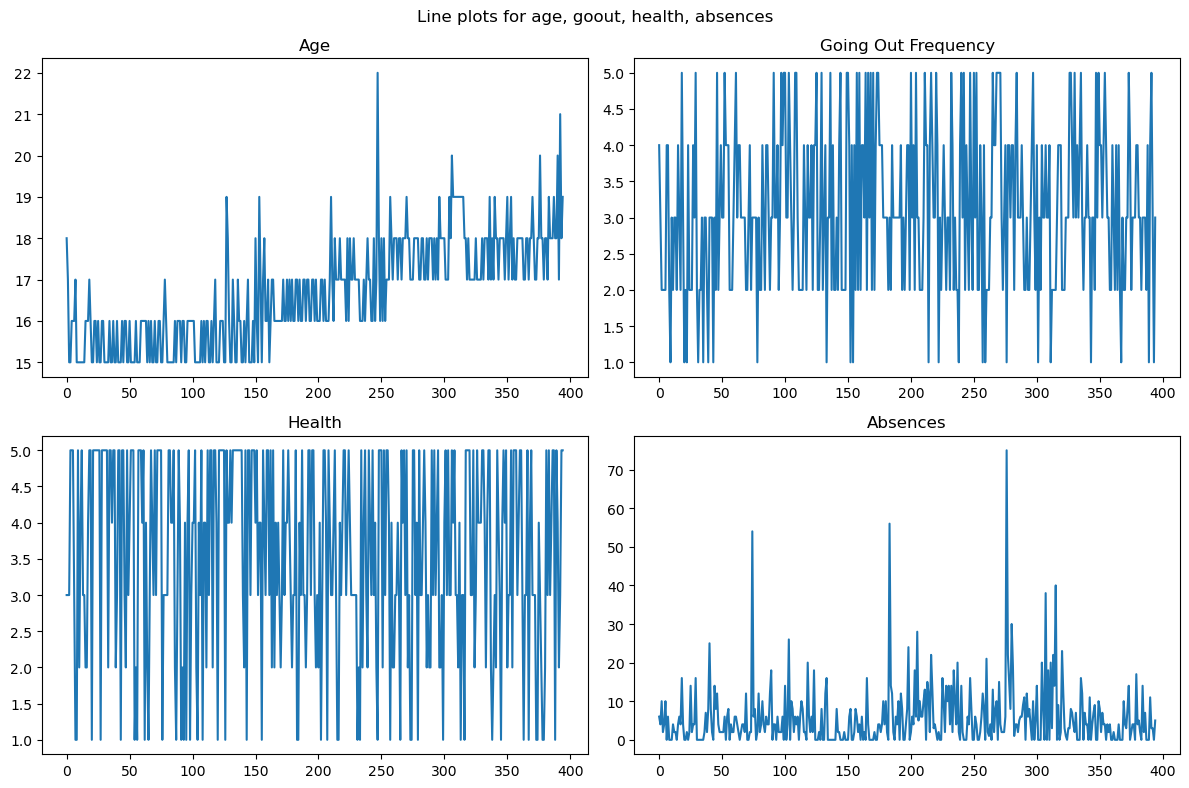

In [101]:
#Line plots for age, goout, health, absences

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df_mat['age'])
plt.title("Age")

plt.subplot(2, 2, 2)
plt.plot(df_mat['goout'])
plt.title("Going Out Frequency")

plt.subplot(2, 2, 3)
plt.plot(df_mat['health'])
plt.title("Health")

plt.subplot(2, 2, 4)
plt.plot(df_mat['absences'])
plt.title("Absences")

plt.suptitle("Line plots for age, goout, health, absences")
plt.tight_layout()
plt.show()



This figure shows how student age, going out frequency, self-reported health, and absences vary across the dataset. Age shows a slight upward trend, while health and going out frequency fluctuate consistently. Absences reveal a few extreme outliers, indicating that some students miss far more school than others, which could impact their performance.

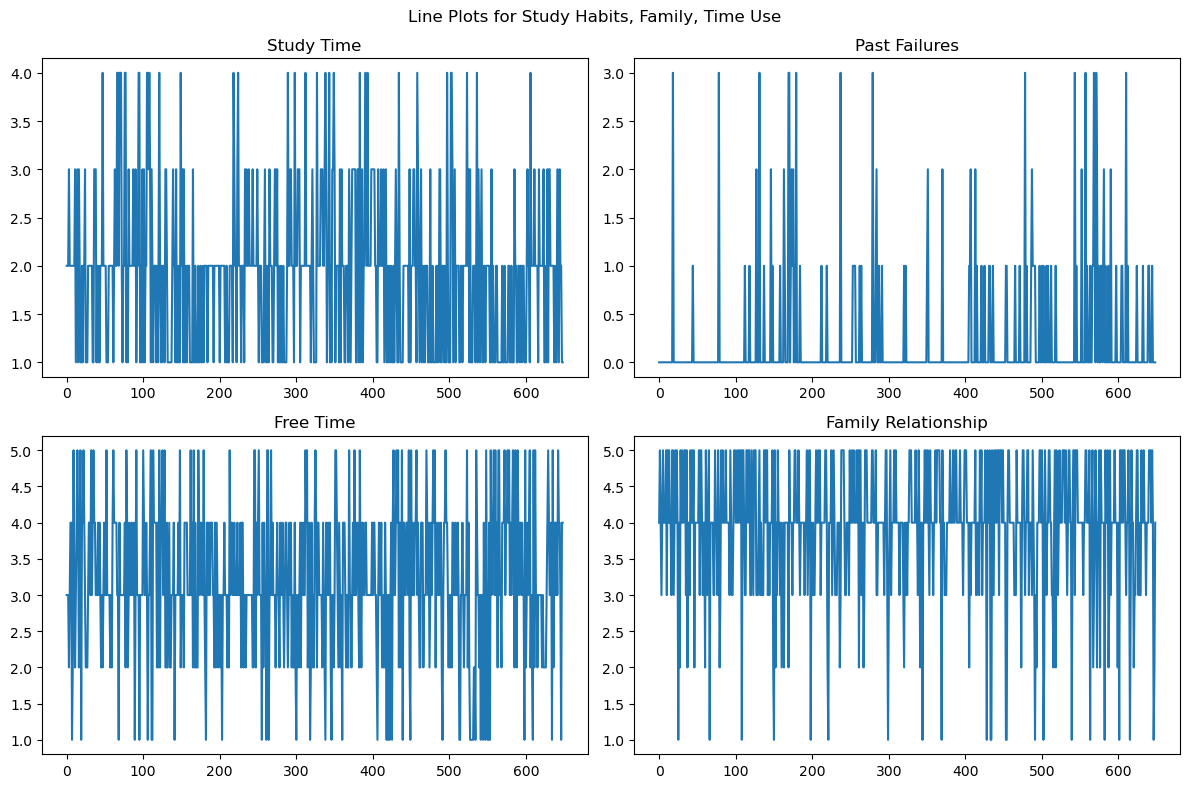

In [107]:
#Line plots for studytime, failures, freetime, famrel 
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df_por['studytime'])
plt.title("Study Time")

plt.subplot(2, 2, 2)
plt.plot(df_por['failures'])
plt.title("Past Failures")

plt.subplot(2, 2, 3)
plt.plot(df_por['freetime'])
plt.title("Free Time")

plt.subplot(2, 2, 4)
plt.plot(df_por['famrel'])
plt.title("Family Relationship")

plt.suptitle("Line Plots for Study Habits, Family, Time Use")
plt.tight_layout()
plt.show()


These figures present studytime, past failures, freetime, and family relationship quality.
Most students report low past failures and consistent family support. Studytime and freetime vary significantly, showing different academic habits and lifestyles.  

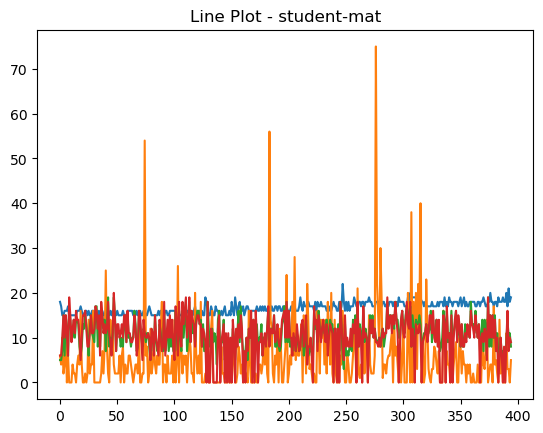

In [47]:
#Line plots for age, absences , G1, G3
plt.plot(df_mat['age'])
plt.plot(df_mat['absences'])
plt.plot(df_mat['G1'])
plt.plot(df_mat['G3'])
plt.title("Line Plot - student-mat")
plt.show()



This line plot shows trends for student age, number of absences, and first (G1) and final (G3) grades.
Age, G1, and G3 remain mostly stable across students. In contrast, absences show spikes a sma.  This shows that a number of students have exceptionally high absence counts, while most have relatively few.

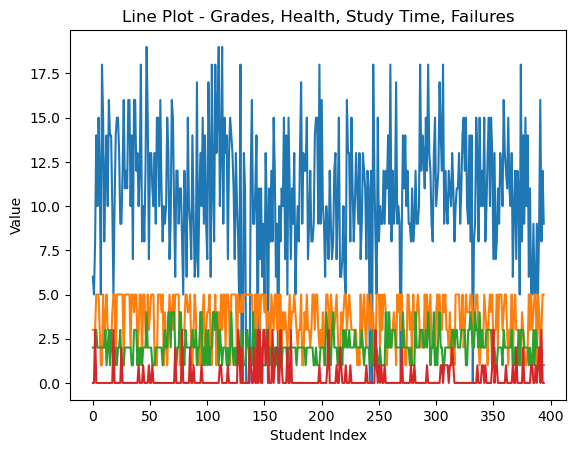

In [112]:
plt.plot(df_mat['G2'], label='G2')
plt.plot(df_mat['health'], label='Health')
plt.plot(df_mat['studytime'], label='Study Time')
plt.plot(df_mat['failures'], label='Failures')
plt.title("Line Plot - Grades, Health, Study Time, Failures")
plt.xlabel("Student Index")
plt.ylabel("Value")
plt.show()



This line plot visualizes G2 grades, self-reported health, study time, and number of past failures for each student.
This plot shows that G2 grades vary significantly across students, while health, study time, and failures are mostly consistent. Most students report good health, low study time, and few failures.

Data Mining Tasks

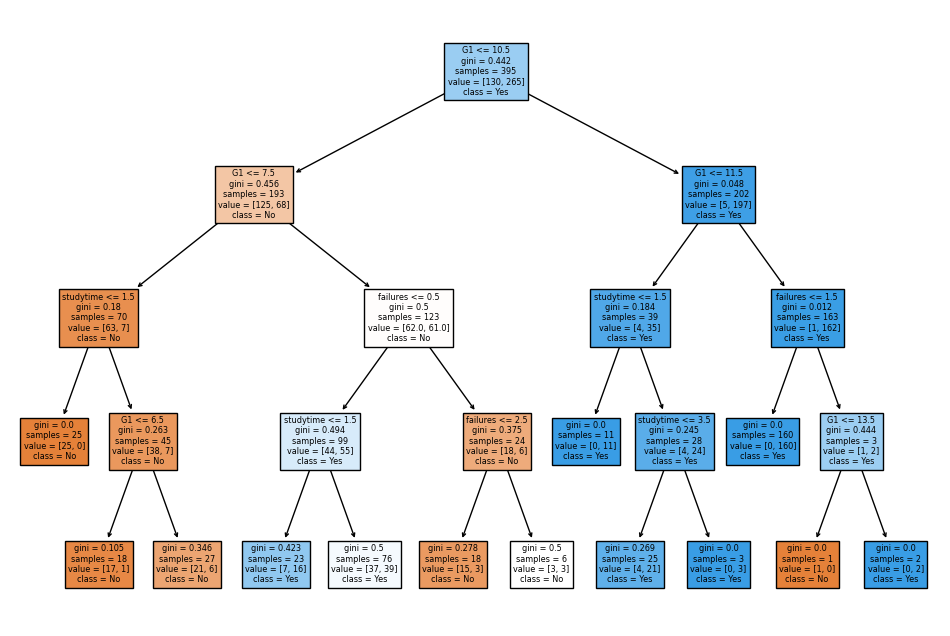

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define target
df_mat['Pass'] = ['Yes' if g >= 10 else 'No' for g in df_mat['G3']]

# Features: same style from screenshots
X = df_mat[['studytime', 'failures', 'G1']]
y = df_mat['Pass']

clf = DecisionTreeClassifier(max_depth=4, random_state=1234)
clf.fit(X, y)

# Visualize tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['studytime', 'failures', 'G1'], class_names=['No', 'Yes'], filled=True)
plt.show()


This decision tree classifies students as passing (Yes) or failing (No) based on G1, study time, and number of past failures. G1 is the most important predictor, with higher G1 scores strongly linked to passing, which makes sense given that previous high performers will liekly continue to at least pass. The key takeaway is that previous academic performance is the strongest indicator of final success.

In [120]:
#Create binary target
df_por['Pass'] = [1 if g >= 12 else 0 for g in df_por['G3']]
#Features
X = df_por[['studytime', 'absences', 'G1']]
y = df_por['Pass']
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
#Train
clf = MultinomialNB()
clf.fit(X_train, y_train)
#Predict
y_pred = clf.predict(X_test)
#Accuracy
accuracy_score(y_test, y_pred)


0.6692307692307692

In [122]:
df_por['Pass'].value_counts(normalize=True) * 100

Pass
1    53.620955
0    46.379045
Name: proportion, dtype: float64

A binary target variable `Pass` based on G3 ≥ 12. About 53.6 % of students passed and 46.4 % failed.

Using `studytime`, `absences`, and `G1`, a Naive Bayes model was  66.9 % accurater.

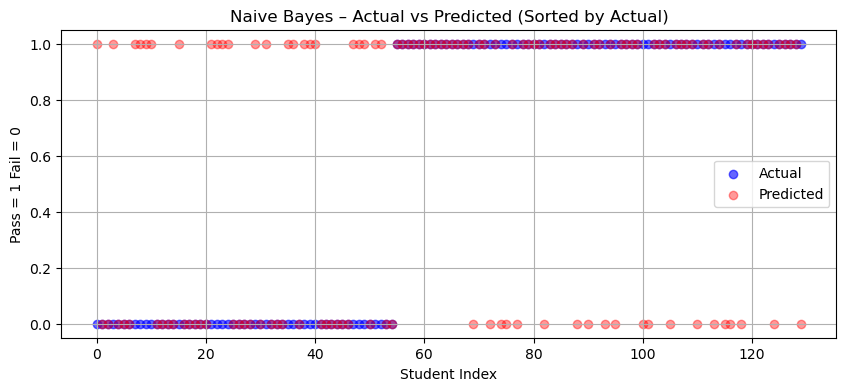

In [147]:
sorted_indices = y_test.sort_values().index
plt.figure(figsize=(10, 4))
plt.scatter(range(len(y_test)), y_test.loc[sorted_indices], color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), pd.Series(y_pred, index=y_test.index).loc[sorted_indices], color='red', label='Predicted', alpha=0.4)
plt.title("Naive Bayes – Actual vs Predicted (Sorted by Actual)")
plt.xlabel("Student Index")
plt.ylabel("Pass = 1 Fail = 0")
plt.legend()
plt.grid(True)
plt.show()


Using studytime, absences, and G1, the Naive Bayes model achieved ~67% accuracy. The scatter plot shows reasonable alignment but clear misclassifications.

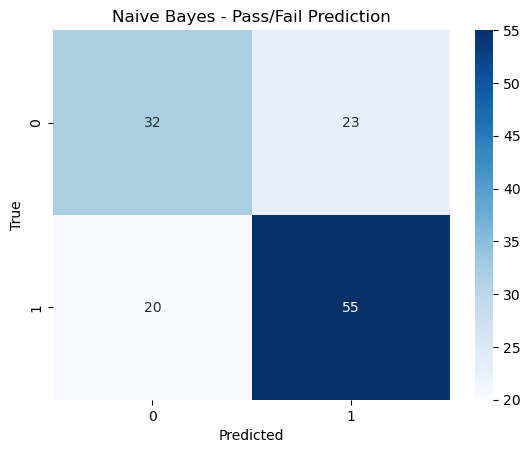

In [127]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Naive Bayes - Pass/Fail Prediction")
plt.show()


The confusion matrix shows the Naive Bayes classifier correctly predicted 55 passes and 32 fails, but misclassified 43 students. This performance isnt very good.  

In [79]:
#Label G3 into categories
def grade_group(g):
    if g >= 15:
        return 'High'
    elif g >= 10:
        return 'Medium'
    else:
        return 'Low'
df_por['G3_Level'] = df_por['G3'].apply(grade_group)
#Encode target
le = LabelEncoder()
y = le.fit_transform(df_por['G3_Level'])
#Encode categorical features
X = df_por[['studytime', 'failures', 'schoolsup', 'famsup', 'activities']].apply(LabelEncoder().fit_transform)
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
#Train NB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

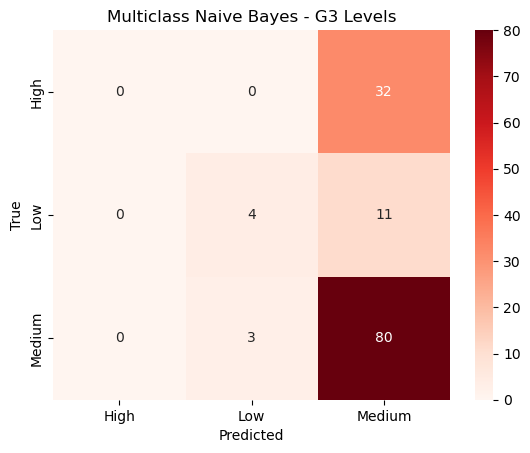

In [77]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Multiclass Naive Bayes - G3 Levels")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Multiclass Naive Bayes
The model predicts “Medium” grades well (80 correct), but fails to identify any “High” grades and struggles with “Low” grades.